<h1 style="color: green;"><strong>Exploring the Emotional Impact of Music Across Genres</strong></h1>

## By: Santiago Gray
### Table of Contents
- [Introduction](#Introduction)
- [Genre Attributes Analysis](#Genre_Attributes_Analysis)
- [Sentiment Analysis](#Sentiment_Analysis)
- [Neo Mellow In depth Analysis](#Neo_Mellow_Artists_Analysis)
- [Conclusion](#Conclusion)
- [Works Cited](#Sources)

#
#
# **Introduction**
### Overview
#### Music has the unique ability to evoke a wide range of emotions, from joy and excitement to calm and relaxation. Different genres are often associated with distinct emotional experiences, influenced by elements such as rhythm, tempo, and melody. This project explores how various musical genres affect listeners' emotions and aims to uncover patterns across genres by analyzing the emotional impact of their audio features.
### Objective
#### The primary objective of this project is to investigate the emotional responses triggered by different music genres through the analysis of key audio features. By examining factors such as tempo, valence (emotional positivity), sentiment, and energy levels in top songs across several genres, I hope to determine if there are consistent patterns in how these features influence emotional perception.
### Research Question
#### How do different musical genres influence listeners' emotions, and can this influence be determined by analyzing audio features such as tempo, valence, and sentiment?

#
#
# Backround Information + Some song recommendations :)
## The genres we will be analyzing specifically will be:
### Album Rock | ex. Winds of Change (Scorpions)
- Genre of rock music that originated in the late 1960s and early 1970s. It is characterized by its focus on album-oriented material, often featuring extended compositions and complex arrangements. Album Rock is often seen as a bridge between the more traditional rock and roll of the 1950s and 1960s and the progressive rock of the 1970s. It is also known for its emphasis on musicianship and songwriting, as well as its use of extended instrumental passages and complex arrangements. Album Rock is often seen as a precursor to the more modern genres of alternative rock, grunge, and post-grunge.
### Adult Standards | ex. My Way (Frank Sinatra)
- Genre of music that includes popular songs from the 1920s to the 1980s. It includes a variety of styles, including big band, swing, jazz, Broadway show tunes, and traditional pop. It is often referred to as "easy listening" music, as it is generally considered to be relaxing and calming. It is often heard on radio stations that cater to an older demographic.
### Pop | ex. The Way You Make Me Feel (Michael Jackson)
- Genre of popular music that originated in its modern form in the 1950s, deriving from rock and roll. Pop music is generally more commercial, melodic, and accessible than other genres of music and often incorporates electronic and urban elements. It typically consists of relatively short songs with a verse-chorus structure and is often characterized by catchy hooks and simple, repetitive melodies. Pop music often features a variety of instruments, including drums, guitars, keyboards, and synthesizers.
### British Soul | ex. Set Fire to the Rain (Adele)
- Genre of music that combines elements of soul, funk, and R&B with a distinctly British flavor. It is characterized by its use of soulful vocals, funky rhythms, and a strong emphasis on melody. It often features a mix of live instruments and electronic production, and often incorporates elements of jazz, hip-hop, and reggae. British Soul is often seen as a more laid-back and soulful alternative to the more upbeat and energetic sound of American soul music.
### Neo Mellow | ex. Let It Go (James Bay)
- Neo Mellow is a genre of music that combines elements of alternative rock, pop, and folk music. It is characterized by its mellow, laid-back sound and often features acoustic instruments such as guitars, pianos, and strings. The lyrics are often introspective and reflective, and the overall sound is often dreamy and atmospheric.

Foot Note: This information was gathered from https://volt.fm
#
#

# Genre_Attributes_Analysis

### Step 1: Access and clean the data 

In [3294]:
# we will be using several resources throughout the project so we need to import everything needed for this first part

# Import Resouces needed for the genre_attributes_analysis
import warnings
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# ignore the warnings from plots and other commands
warnings.filterwarnings("ignore")

In [3296]:
# First we want to find a data source that will have top songs, genres, and attributes about the song
# data from Kaggle: https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset

# access the data through pands and show the first 5
songs_df = pd.read_csv('Spotify-2000.csv')
songs_df.head()



,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [3298]:
# in case of duplicates we want to get rid of all songs that might be menitoned twice so lets get rid off any of those

# .drop_duplicates removes all duplicates and by specefying the collumn Title we remove all duplicates in just the collumn Title that come up
# more than once
songs_df = songs_df.drop_duplicates(subset=['Title']) 
songs_df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [3300]:
# print the length & width of the data to see how many rows and collums we are working with
# we also want to print the data types to see if everything is correctly identefied as it should be

print(songs_df.shape) # print the length & width
print(songs_df.dtypes) # print the data types for each collumn

(1958, 15)
Index                      int64
Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)         object
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object


In [3302]:
# we can see that Length(Duration) is an object when it should instead be seen as a number so we need to fix that
# we can also see that the title names are long so we want to simplify them so it is easier to access them

# Simplify the collumn titles to ease accessability
songs_df = songs_df.rename(columns={'Top Genre': 'Genre',
                         'Beats Per Minute (BPM)': 'BPM', 
                         'Loudness (dB)': 'Loudness', 
                        'Length (Duration)': 'Duration'})

# Change Durtaion from an object to a number
songs_df['Duration'] = pd.to_numeric(songs_df['Duration'], errors='coerce')

#show the new altered data
songs_df.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201.0,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207.0,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341.0,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269.0,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256.0,1,3,59


### Step 2: Find the genres with the most occurrences in the data

In [3305]:
# We want to see the top 20 genres with the most occurances in the data so we will need to count the number of occurances and order it

# show the top 20 genres with the most songs in the data
songs_df['Genre'].value_counts().head(20)

album rock           406
adult standards      116
dutch pop             86
alternative rock      85
dance pop             82
dutch indie           75
alternative metal     69
dutch cabaret         51
classic rock          51
dance rock            50
modern rock           49
glam rock             49
pop                   47
art rock              40
permanent wave        38
british invasion      36
irish rock            33
british soul          29
europop               27
classic uk pop        21
Name: Genre, dtype: int64

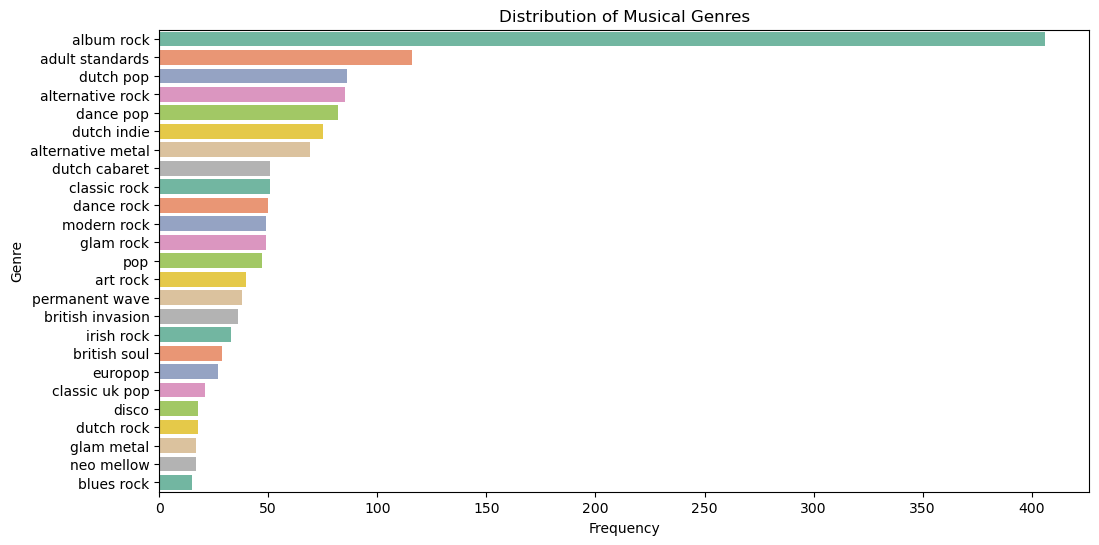

In [3307]:
# We got the data for occurences but in order to make it easier to visualize lets make a countplot to see the # of occurances per genre

# create a plot to show the top 20 genres with the most occurences in the data
plt.figure(figsize=(12, 6))   # chose the size
sb.countplot(y='Genre', data=songs_df, order=songs_df['Genre'].value_counts().head(25).index, palette='Set2') # specify the data to use
plt.title('Distribution of Musical Genres') # set the graph title
plt.xlabel('Frequency') # set the x axis label
plt.ylabel('Genre') # set the y axis label
plt.show()

#### Graph Analysis:
#### This graph shows us what genres have been most successful when it comes to releasing a song that will reach the top charts. We can see that variants of pop and rock seem to be the most common. Utalizing this information we will be selecting 5 genres to analyze from these top most successful 20, and see what attributes are unique or similar to each of the genres that may relay emotion.

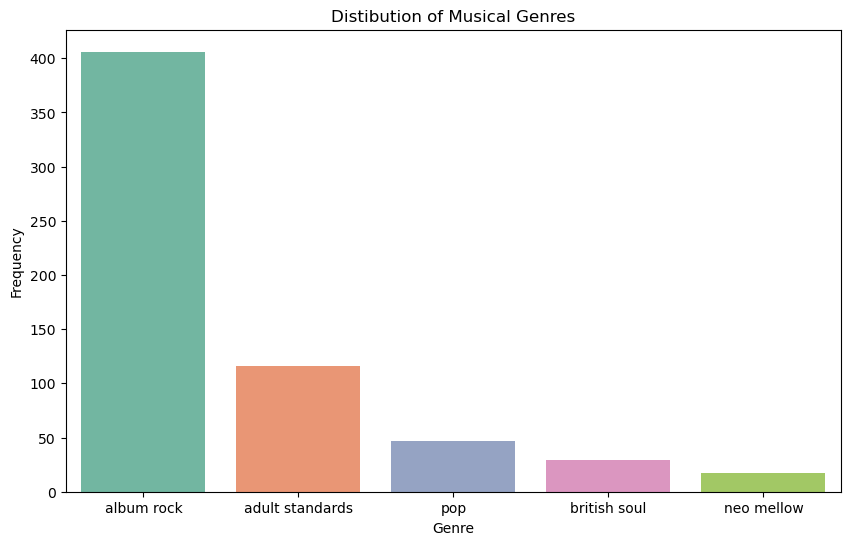

In [3310]:
# We want to now create the same frequency graph showing the distribution of musical genres but only for the 
# genres that we are interested in.

# create a list with the specefied genres and create a filter that will filter the data to only include the specefied genres
genres = ['album rock','adult standards','pop','british soul','neo mellow']
filtered_songs_df = (songs_df[songs_df['Genre'].isin(genres)])

# create a countplot using the filtered data showing only the specefied genres
plt.figure(figsize=(10, 6))  # specify the size
sb.countplot(x='Genre', data=filtered_songs_df,order=filtered_songs_df['Genre'].value_counts().index, palette='Set2')
plt.title("Distibution of Musical Genres") # chose the title we want to use
plt.xlabel('Genre') # set the x axis labeles
plt.ylabel('Frequency') # set the y axis labels
plt.show()

#### Graph Analysis: 
#### Through this graph, we can see that album rock stands out significantly when it comes to producing music that reaches the top charts. After a steep drop to adult standards, there is a steady decline across other genres, with neo mellow coming in last. This suggests that album rock has successfully distinguished itself from the competition, potentially due to certain unique attributes that set it apart from the rest.

## Step 3: Analyze the 5 chosen genres on the following attributes:
1. **BPM (Beats Per Minute):** The tempo or speed of a song, measured by how many beats occur in one minute.
2. **Energy:** A measure of intensity and activity in a song, typically influenced by fast tempos, loudness, and overall dynamic feel.
3. **Danceability:** How suitable a track is for dancing, based on factors like tempo, rhythm stability, and beat strength.
4. **Loudness:** The overall volume of the track, measured in decibels, representing how loud or quiet the song feels.
5. **Liveness:** A measure of how "live" the track sounds, indicating the presence of a live audience or live recording environment.
6. **Valence:** A measure of the musical positivity of a track, where higher values represent happier, more positive moods.
7. **Duration:** The total length of the song, measured in minutes and seconds.
8. **Acousticness:** The likelihood that the track is acoustic, based on the absence of electronic elements or heavy production.
9. **Speechiness:** A measure of how much spoken word content is present in the song, with higher values indicating more speech-like vocals.
10. **Popularity:** A score representing how well-known or liked a song is, typically based on streaming counts, likes, or plays.

In [3314]:
# We want to create a list of the specefied metadata that we will be using in order analyze the genres so that we can make a function that 
# 1. will return the data for only the itmes in the list 
# or 
# 2. will return specific data for each item in the list.

# create the list
statistics = ['BPM', 'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence', 'Duration', 'Acousticness', 'Speechiness']

In [3316]:
# We want to create a function that will take a genre and an optional perameter of year, 
# and return the mean metadata statistics of the genre, for the given year (if specified) 

# create the def named get_genre_statistics with parameter of genre, and year(None if not specefied)
def get_genre_statistics(genre, year=None):
    if year:
        filtered = songs_df.query(f"Genre == '{genre}' and Year == {year}") # if given year, add it as a parameter in the query
    else:
        filtered = songs_df.query(f"Genre == '{genre}'") # if we arn't given year just use genre as the query parameter
    
    mean_stats = filtered[statistics].mean().round(2) # find the mean of the data points and round it to two deciamal points
    
    return (f"Statistics for \033[1m'{genre}'\033[0m\n{mean_stats}") # return the mean for each statistic and bold the album name for clarity

In [3318]:
# We want to go through each genre from the genre list we are analyzing and show the mean of each statistic for that genre

# go through each genre and print the statistics for the genre
for genre in genres:
    print(get_genre_statistics(genre))
    print()

Statistics for 'album rock'
BPM             122.06
Energy           59.68
Danceability     51.33
Loudness        -10.00
Liveness         17.90
Valence          52.64
Duration        291.76
Acousticness     26.79
Speechiness       4.84
dtype: float64

Statistics for 'adult standards'
BPM             118.07
Energy           43.56
Danceability     49.34
Loudness        -11.46
Liveness         19.63
Valence          54.75
Duration        217.41
Acousticness     50.50
Speechiness       3.96
dtype: float64

Statistics for 'pop'
BPM             114.06
Energy           60.36
Danceability     65.28
Loudness         -7.74
Liveness         16.40
Valence          51.55
Duration        267.40
Acousticness     36.79
Speechiness       5.36
dtype: float64

Statistics for 'british soul'
BPM             114.24
Energy           57.52
Danceability     55.90
Loudness         -6.45
Liveness         13.41
Valence          42.00
Duration        273.69
Acousticness     41.21
Speechiness       3.90
dtype: float

### Data Analysis | Noticable things that stanand out would be:
- **neo mellow** and **album rock**'s high BPM 
- **neo mellow**'s low Energy compared to the rest
- **neo mellow**'s low valance
- **album rock**'s long duration and **neo mellow**'s low duration
- **album rock**'s low acousticness and **neo mellow**'s high accousticness

Takeaways **neo mellow** and **album rock** seem to set the bars for high and lows when it comes to sertain statistics. Everything else seems to be in between the two. We could make a hypothesis that:
- **album rock** may have a characteristic of high BPM, long duration, and low acousticness resulting in a specific feeling, and a definig characteristic setting it apart from the rest as the genre with most top chart songs.
- **neo mellow** may have a characteristic of low energy, low valance, low duration, and high accousticness also resulting in a specific feeling, and maybe a defining characteristic that sets it apart from the rest as the least top chart songs of the group we are analyzing. 


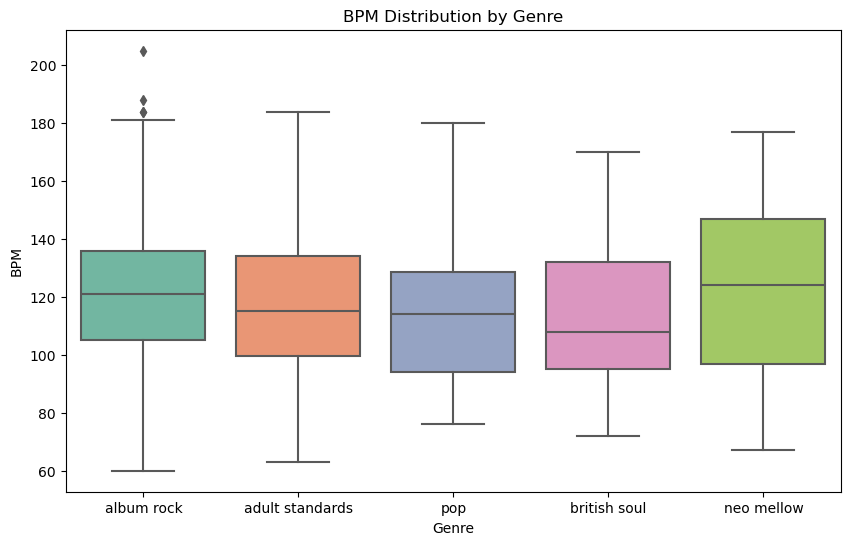

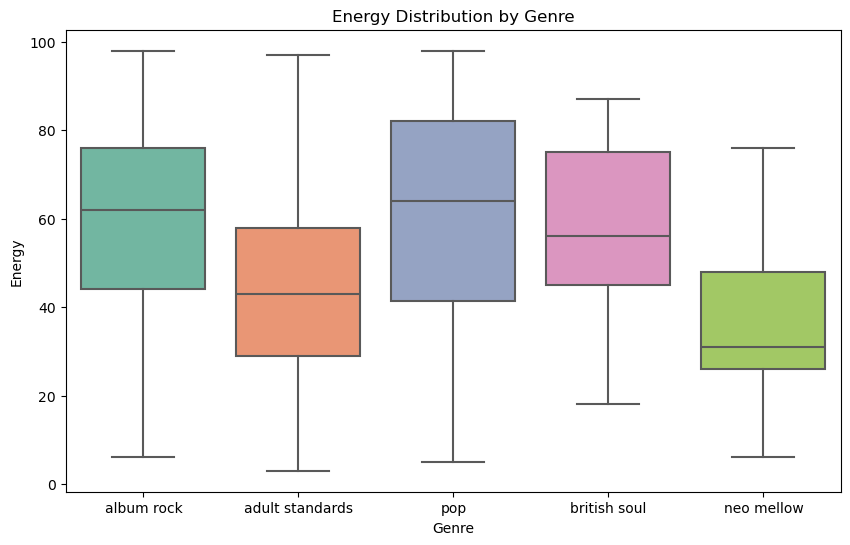

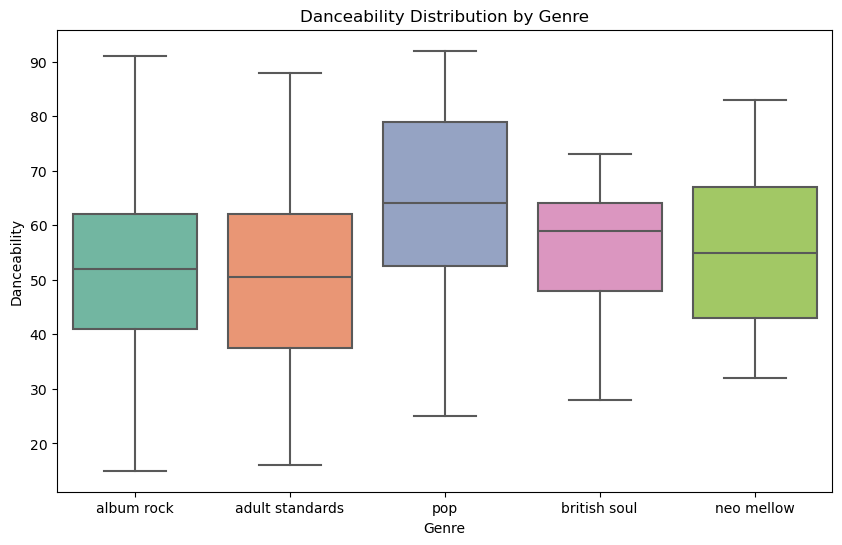

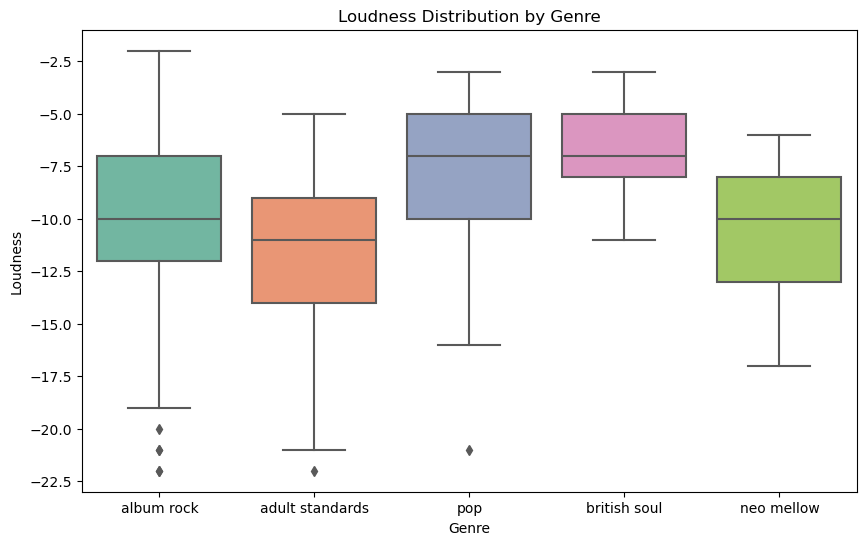

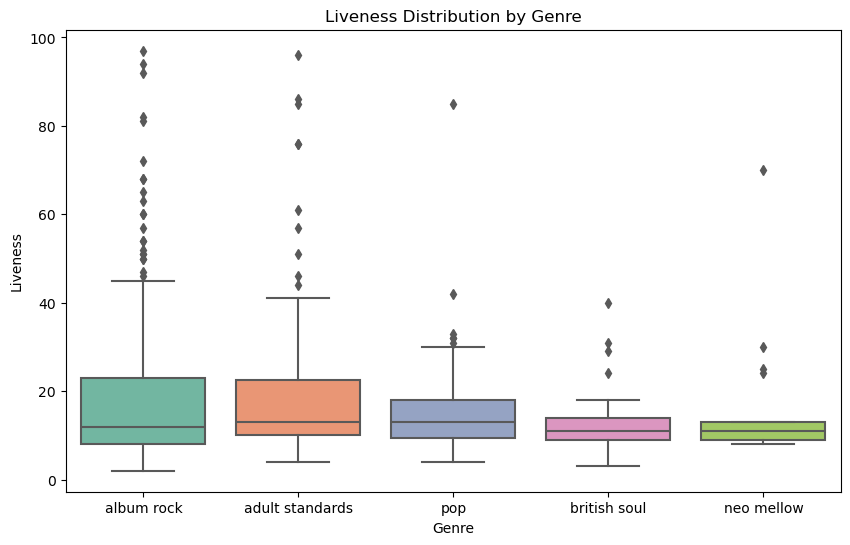

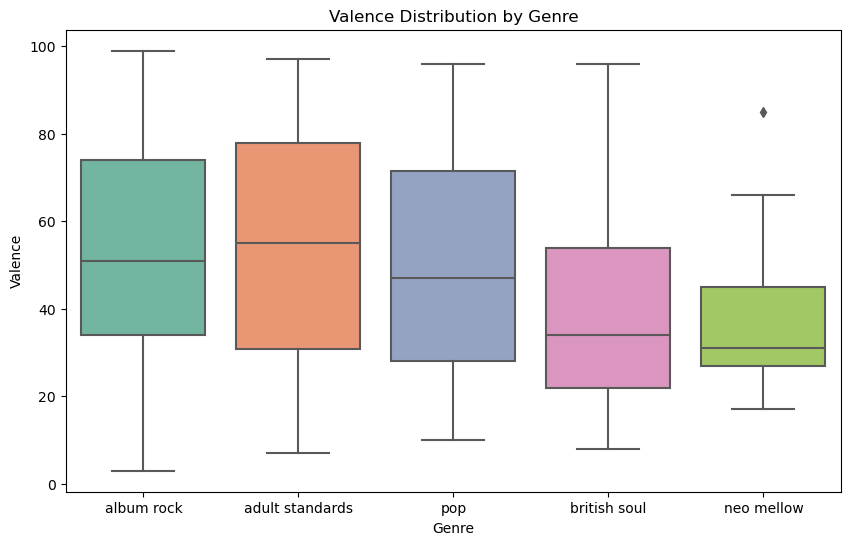

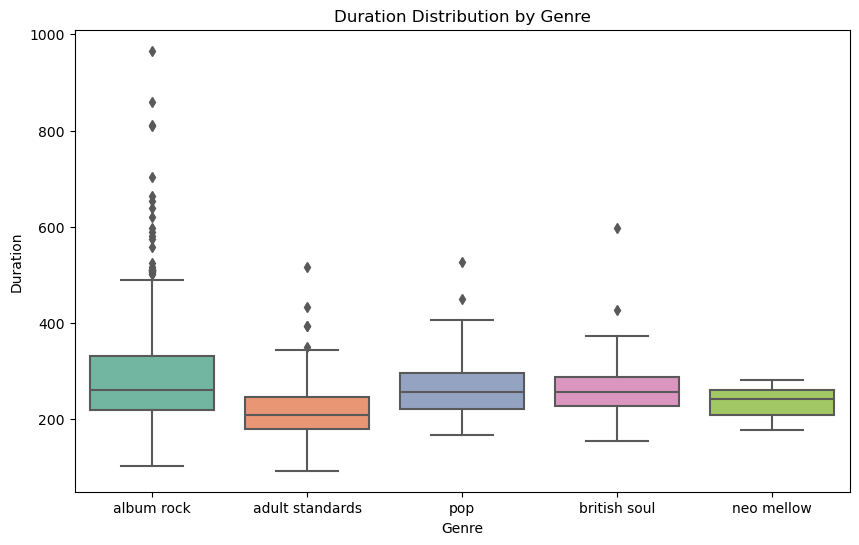

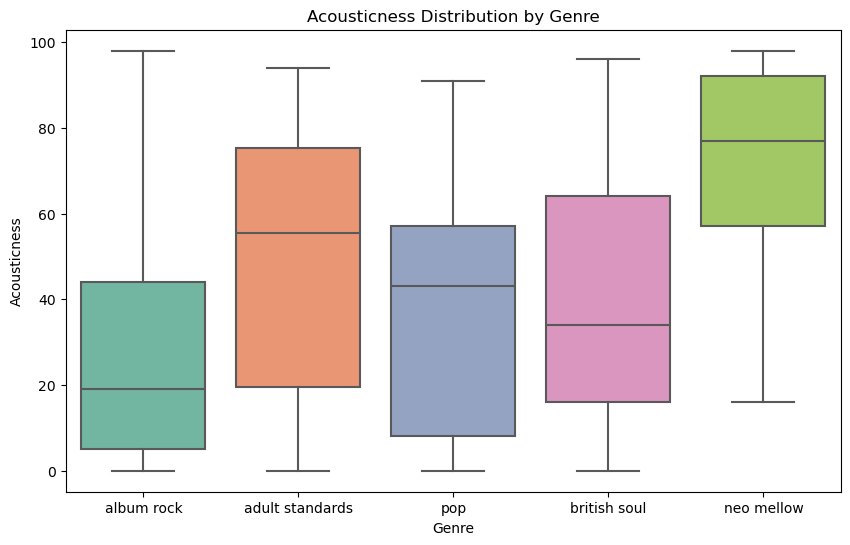

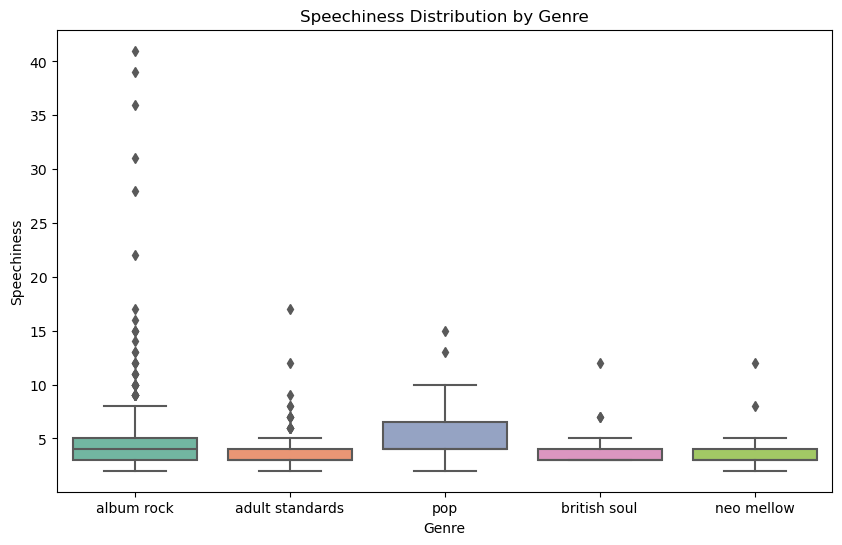

In [3321]:
# we can read the data easily but the mean can only tell so much of the story since it could be skewed so...
# lets make a box plot that will show all the data points for each attribute and how they compare for each genre. 

# Go through each collumn/category of attributs and show how each genre compares to the rest in that category
for stat in statistics:
    plt.figure(figsize=(10, 6))  # set the size of our plots
    # for the data we want to use the data set we created that only has the genres specefied 
    # we also want to order it so that we have the genre with the highest frequency from before on the left to lowest on the right
    # this way it will be easier to view the information given compared to how successful that genre is
    sb.boxplot(x='Genre', y=stat, data=filtered_songs_df,order=filtered_songs_df['Genre'].value_counts().index, palette='Set2') 
    plt.title(f"{stat} Distribution by Genre") # create a unique title for each statistic
    plt.xlabel("Genre") # set the x axis lable
    plt.ylabel(stat) # set the y axis lable
    plt.show()
    print() # have a space in between graphs to prevent clustering

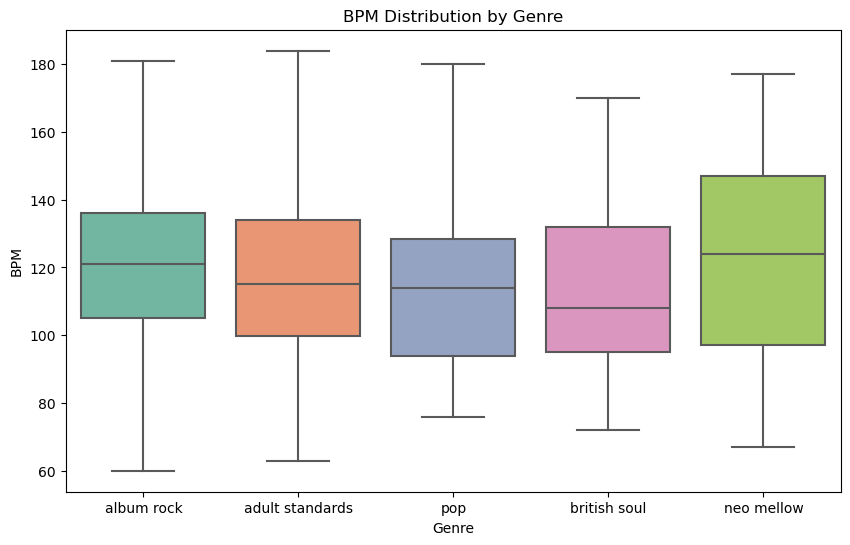

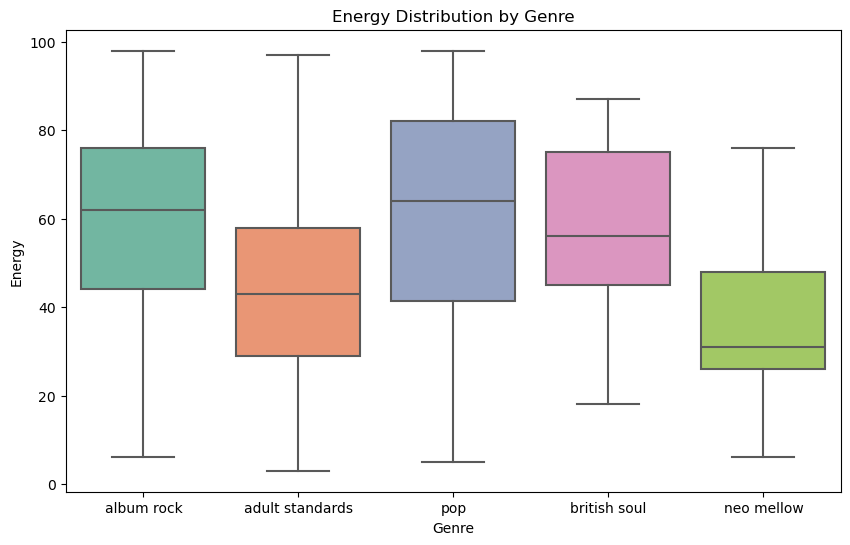

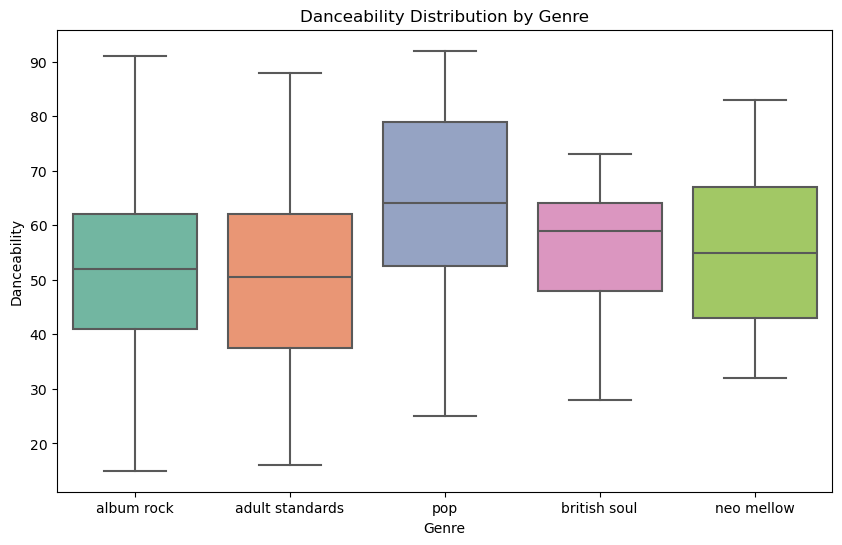

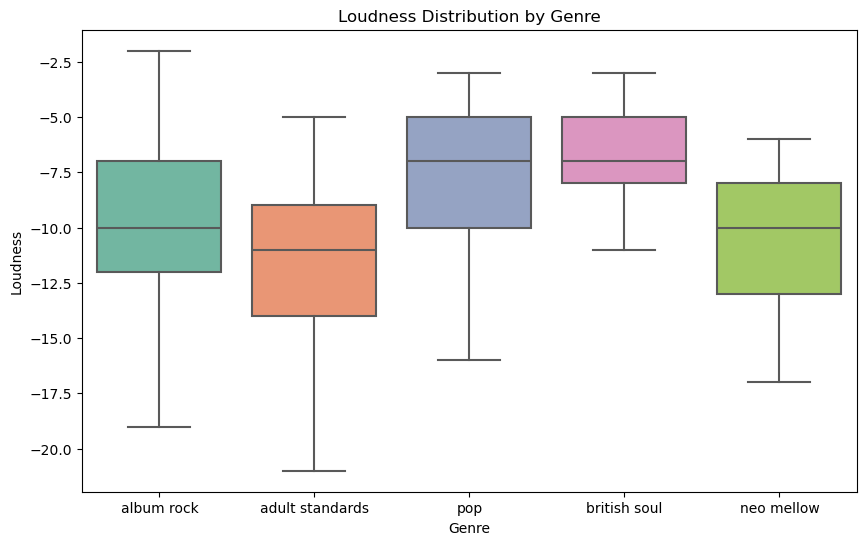

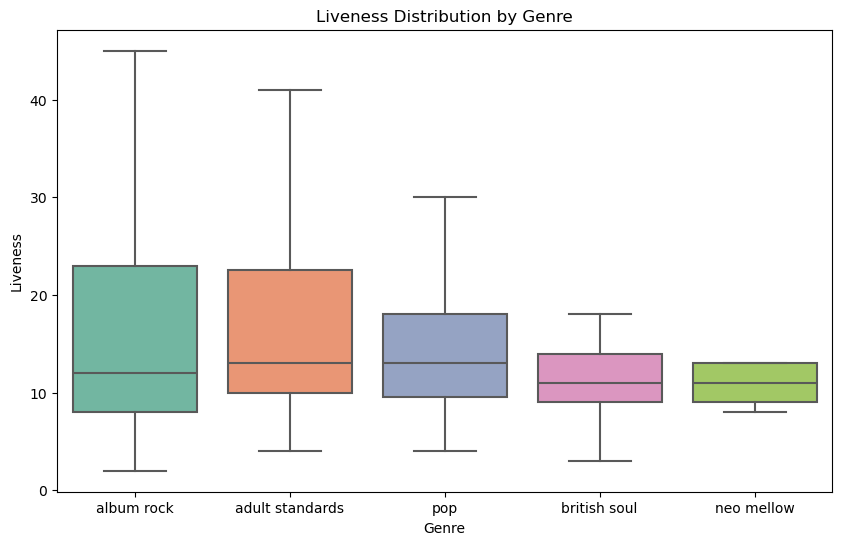

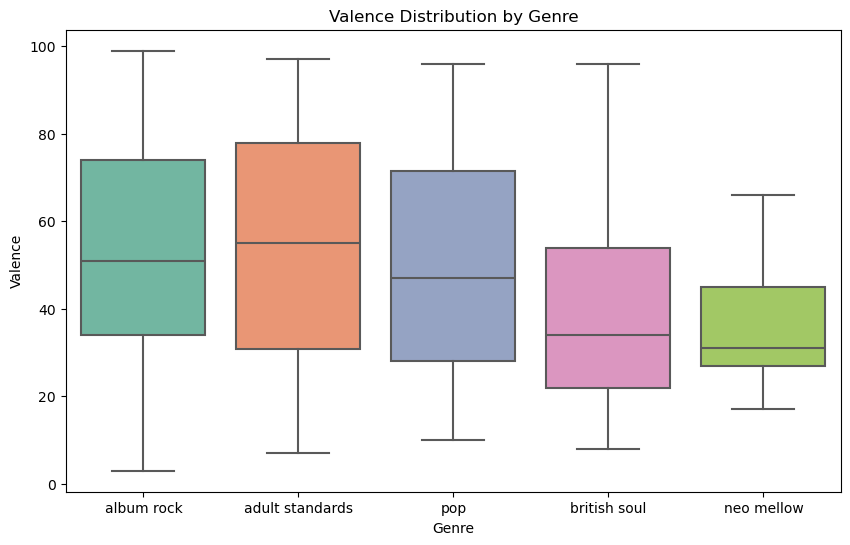

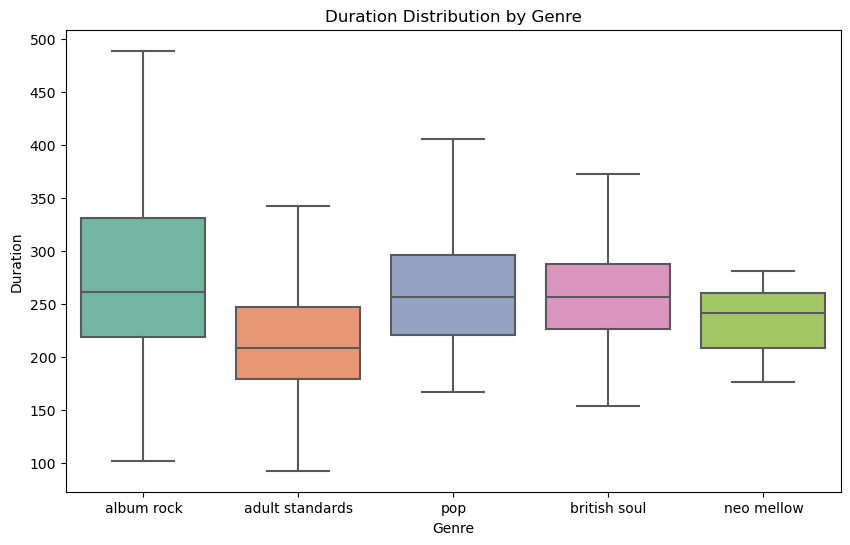

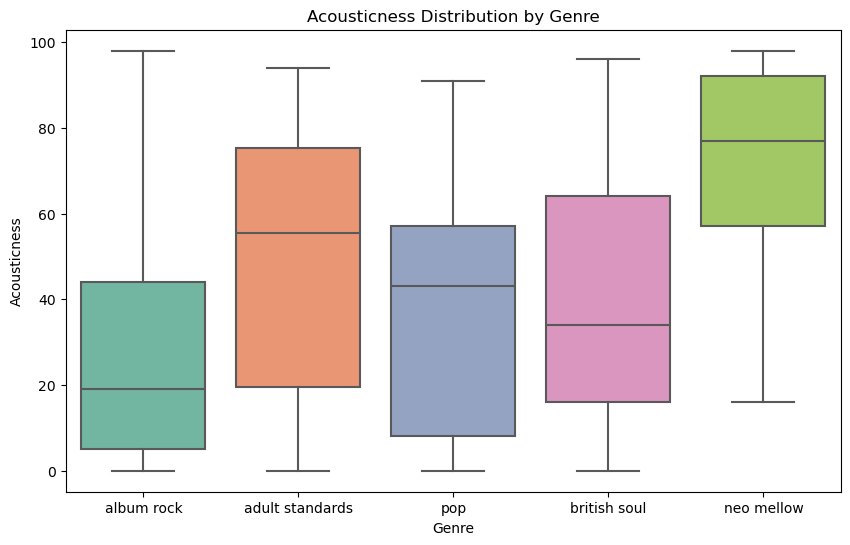

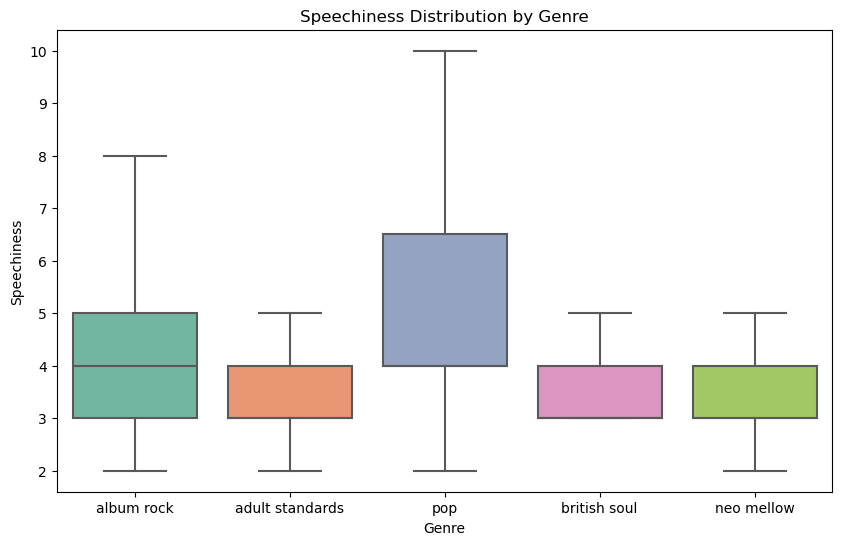

In [3323]:
# We can see that there are several outliers in the box plots, especially when it comes to album rock. This is probably primarily since 
# album rock has the most data to work with, it is more likely to have outliers. In order to analzye the data we will want to create the 
# exact same graphs as above but remove outliers with the function 'showfliers=False'

# create the same exact visual as before but this time remove the outliers with 'showfliers=False'
for stat in statistics:
    plt.figure(figsize=(10, 6))  # set the size of our plots
    sb.boxplot(x='Genre', y=stat, data=filtered_songs_df,order=filtered_songs_df['Genre'].value_counts().index, 
               showfliers=False,palette='Set2') # showfliers=False removes the outliers in the box plots
    plt.title(f"{stat} Distribution by Genre") # create a unique title for each statistic
    plt.xlabel("Genre") # set the x axis lable
    plt.ylabel(stat) # set the y axis lable
    plt.show()
    print() # have a space in between graphs to prevent clustering

### Graph Analysis
#### BPM
- All Genres seem to be very similar to each other with a median near 120 and a wide range. Because of this we can rule out bpm as a factor that creates a specific sentiment.  
#### Energy 
- We can see that neo mellow seems to have a clear lower energy compared to the rest. adult standard seems to be on the lower spectrum while album rock, pop, and british soul are on the higher ends. We can hypothesise that energy does play an impact on emotial response and the genre.
#### Danceability
- All genres seem to have close 50% of the values near 55. Pop seems to be on the higher end compared to the rest. We can hypothesise that danceability is a key factor in pop genre. 
#### Loudness
- When it comes to volume, biritish soul is teh clear winner for the higest loudness. Pop is also on the higher end while the rest have a wider range of values. We can assume that pop and biritsh soul both have a charactersitic of higher volume. 
#### Liveness
- Liveness has a clear pattern with rock having a wide range of high values and narrowing down the further you go up until neo mellow with a very condenced and low livenes. This signifies that there is a high probability that liveness is a deffining factor for the sucess of the song but also creates a lead that it might have a correlation between emotion and genre 
#### Valence
- Valance seems to be the same among the top three but with the last two british soul it seems to drop, and with neo mellow is drops even further. This might simbolyze song sucessfulness because of the declining pattern but also have an impact in emotional impact
#### Duration
- Duration seems to be very even among all the genres with odult standards standing out for being lower compared to the rest.
#### Acousticness
- We are able to see that album rock has a low accousticness while neo mello has a higher acousticness. The rest do have very wide ranges of data but we could assume that rock and neo mellow both have that unique quality compared to the rest
#### Speechiness
- None seem to stand out from the rest except for pop and slightly album rock. Pop is the clear outlier showing a high and wide range of values when it comes to speechiness. Same with album rock but the range is slightly smaller than pop. 
####
#### Take Aways: 
- **album rock** has a **high** energy level, speechiness, liveness, and a **low** acousticness.
- **adult standards** has a **low** energy level, loudness, and duration.
- **pop** has a **high** energy, danceability, loudness and speechiness.
- **british soul** has a **high** loudness, and a **low** valance.
- **neo mellow** has a **high** accousticness, and a **low** energy, valance, liveness.

# Sentiment_Analysis

### Step 1: Access and clean the data 

In [3328]:
# Import Resouces needed for the lyrics analysis
# nltk sentiment analyzer will be used to find the sentient for each song lyrics (negative, neutral, positive, and compound)

# Import sentiment analyzer as sia
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [3330]:
# Now we will need a source that includes the lyrics of the songs. The lyrics are needed in order for the sentiment analyzer to go through 
# each word and be able to return the sentiment for the given song
# data from Kaggle: https://www.kaggle.com/datasets/brianblakely/top-100-songs-and-lyrics-from-1959-to-2019?select=all_songs_data_processed.csv

# open the data for this section with pandas and show the first 5
lyrics_df = pd.read_csv('all_songs_data_processed.csv')
lyrics_df.head()

,Album,Album URL,Artist,Featured Artists,Lyrics,Media,Rank,Release Date,Song Title,Song URL,Writers,Year,Verbs,Nouns,Adverbs,Corpus,Word Counts,Unique Word Counts
0,Battle of New Orleans,https://genius.com/albums/Johnny-horton/Battle...,Johnny Horton,[],In 1814 we took a little trip Along with Colo...,[{'native_uri': 'spotify:track:0dwpdcQkeZqpuoA...,1,1959-04-01,The Battle Of New Orleans,https://genius.com/Johnny-horton-the-battle-of...,"[{'api_path': '/artists/561913', 'header_image...",1959.0,take take take catch fire keep be be fire begi...,trip bacon bean town gun comin while river of'...,along as ago once more so as ago once more the...,take little trip Colonel Jackson mighty Missis...,435,155
1,That’s All,https://genius.com/albums/Bobby-darin/That-s-all,Bobby Darin,[],"Oh the shark, babe Has such teeth, dear And he...",[{'native_uri': 'spotify:track:3E5ndyOfO6vFDEI...,2,NaN,Mack The Knife,https://genius.com/Bobby-darin-mack-the-knife-...,"[{'api_path': '/artists/218851', 'header_image...",1959.0,have show have keep know bite billow spread be...,shark babe tooth jackknife babe sight shark to...,pearly just so never never now just just down ...,oh shark babe tooth dear show pearly white jac...,224,145
2,“Mr Personality’s” 15 Big Hits,https://genius.com/albums/Lloyd-price/Mr-perso...,Lloyd Price,[],Over and over I tried to prove my love to you ...,"[{'provider': 'youtube', 'start': 0, 'type': '...",3,NaN,Personality,https://genius.com/Lloyd-price-personality-lyrics,"[{'api_path': '/artists/355804', 'header_image...",1959.0,try prove do say get get do cause get get do s...,love friend fool fool personality personality ...,over over over over over over so over now over...,try prove love friend say fool fool cause get ...,215,55
3,The Greatest Hits Of Frankie Avalon,https://genius.com/albums/Frankie-avalon/The-g...,Frankie Avalon,[],"Hey, Venus! Oh, Venus! Venus, if you will Ple...",[],4,NaN,Venus,https://genius.com/Frankie-avalon-venus-lyrics,"[{'api_path': '/artists/1113175', 'header_imag...",1959.0,send thrill want make take place ask promise g...,girl girl kiss arm girl charm girl sunlight ha...,surely too always as long surely too always as...,hey Venus oh Venus Venus send little girl thri...,166,74
4,Paul Anka Sings His Big 15,https://genius.com/albums/Paul-anka/Paul-anka-...,Paul Anka,[],I'm just a lonely boy Lonely and blue I'm all ...,[],5,NaN,Lonely Boy,https://genius.com/Paul-anka-lonely-boy-lyrics,[],1959.0,do get think want love love kiss hold like hea...,boy nothing moment love night day boy nothing ...,just all just all just so hard just all,lonely boy lonely blue get think want love yes...,140,68


In [3332]:
# We want to see how many songs we are working with in the data set by useing .shape to see the number of rows 
# we also want to make sure the data types are what they should be so we use .dtypes to see the what the collumn data types are

print(lyrics_df.shape) # show the collumn and row count 
print(lyrics_df.dtypes) # show the data types

(6292, 18)
Album                  object
Album URL              object
Artist                 object
Featured Artists       object
Lyrics                 object
Media                  object
Rank                    int64
Release Date           object
Song Title             object
Song URL               object
Writers                object
Year                  float64
Verbs                  object
Nouns                  object
Adverbs                object
Corpus                 object
Word Counts             int64
Unique Word Counts      int64
dtype: object


### Step 2. 
### a. Merge Both of the data sets we have used so far on the joining factor of both tables having the song
### b. View how many songs we have to work with and view the number of occurances for genres using a visual

In [3335]:
# We will be joining both the songs_df data set and this one together in order to have it all in one place and also becuse some songs 
# might be in the first collumn but not in the second so this will ignore the ones without lyrics in the second data
# to reduce repetition and simplicity we will drop the unneeded collumns and repetition of others

# get rid og collumns we dont need
lyrics_df = lyrics_df.drop(['Album URL', 'Featured Artists', 'Media', 'Rank', 'Song URL', 'Writers', 'Release Date',
                           'Artist','Year','Verbs','Nouns','Adverbs','Corpus'], axis=1)

# Rename the column to just title so it matches the other data set for when joining them together
lyrics_df = lyrics_df.rename(columns={'Song Title':'Title'}) 
lyrics_df = lyrics_df.dropna(subset=['Lyrics']) # Any lyrics that have missing lyrics data drop those 
lyrics_df.head() # show the new data we are working with

,Album,Lyrics,Title,Word Counts,Unique Word Counts
0,Battle of New Orleans,In 1814 we took a little trip Along with Colo...,The Battle Of New Orleans,435,155
1,That’s All,"Oh the shark, babe Has such teeth, dear And he...",Mack The Knife,224,145
2,“Mr Personality’s” 15 Big Hits,Over and over I tried to prove my love to you ...,Personality,215,55
3,The Greatest Hits Of Frankie Avalon,"Hey, Venus! Oh, Venus! Venus, if you will Ple...",Venus,166,74
4,Paul Anka Sings His Big 15,I'm just a lonely boy Lonely and blue I'm all ...,Lonely Boy,140,68


In [3337]:
# Now that we have cleaned up the new data set, lets go ahead and merge the two data sets so that we have the first data but also
# add in the new data that has the lyrics of the song. Because one data might have different capitalization than the other, we will lower
# the song titles to all lower case to make sure it is able to match songs properly

# Create new columns with lowercase 'Title' in both DataFrames
lyrics_df['Title_lower'] = lyrics_df['Title'].str.lower()
songs_df['Title_lower'] = songs_df['Title'].str.lower()

# join only the data rows that have the same song name on both data sets) 
# 'Inner Join' joining the two data sets on the song Title as the joining factor
merged_df = pd.merge(lyrics_df, songs_df, on='Title', how='inner')
merged_df.head() # show the new data set we created

,Album,Lyrics,Title,Word Counts,Unique Word Counts,Title_lower_x,Index,Artist,Genre,Year,...,Energy,Danceability,Loudness,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity,Title_lower_y
0,The Greatest Hits Of Frankie Avalon,"Hey, Venus! Oh, Venus! Venus, if you will Ple...",Venus,166,74,venus,1964,Shocking Blue,classic rock,1969,...,76,69,-6,8,96,188.0,46,4,59,venus
1,At Home,A godness on a mountain top Was burning like ...,Venus,132,56,venus,1964,Shocking Blue,classic rock,1969,...,76,69,-6,8,96,188.0,46,4,59,venus
2,True Confessions,Goddess on the mountain top Burning like a sil...,Venus,200,57,venus,1964,Shocking Blue,classic rock,1969,...,76,69,-6,8,96,188.0,46,4,59,venus
3,Paul Anka Sings His Big 15,I'm just a lonely boy Lonely and blue I'm all ...,Lonely Boy,140,68,lonely boy,451,The Black Keys,alternative rock,2011,...,87,36,-8,10,61,194.0,0,7,73,lonely boy
4,What’s Wrong with This Picture?,"He was born on a summer day, 1951 And with a ...",Lonely Boy,259,122,lonely boy,451,The Black Keys,alternative rock,2011,...,87,36,-8,10,61,194.0,0,7,73,lonely boy


In [3339]:
# we can see that there are repetitions of the same song from different albums. We want to remove the duplicates in order to gather a more 
# accurate analysis of the data

# .drop_duplicates removes all the duplictes and when we specify a subset it will drop all the duplicates in that specific collumn
merged_df = merged_df.drop_duplicates(subset=['Title']) 
merged_df.head()

,Album,Lyrics,Title,Word Counts,Unique Word Counts,Title_lower_x,Index,Artist,Genre,Year,...,Energy,Danceability,Loudness,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity,Title_lower_y
0,The Greatest Hits Of Frankie Avalon,"Hey, Venus! Oh, Venus! Venus, if you will Ple...",Venus,166,74,venus,1964,Shocking Blue,classic rock,1969,...,76,69,-6,8,96,188.0,46,4,59,venus
3,Paul Anka Sings His Big 15,I'm just a lonely boy Lonely and blue I'm all ...,Lonely Boy,140,68,lonely boy,451,The Black Keys,alternative rock,2011,...,87,36,-8,10,61,194.0,0,7,73,lonely boy
5,Dementia 2000! 30th Anniversary Collection,"Fe-fe, fi-fi, fo-fo, fum I smell smoke in the ...",Charlie Brown,178,64,charlie brown,478,Coldplay,permanent wave,2011,...,74,43,-7,33,9,285.0,2,4,67,charlie brown
6,The Dynamic Stonewall Jackson,Waterloo Waterloo Where will you meet your Wat...,Waterloo,184,78,waterloo,945,ABBA,europop,1974,...,93,44,-5,24,78,169.0,42,5,58,waterloo
8,NaN,Wind and storm (Ooh-ooh) Gone's the sun (The s...,Tragedy,99,62,tragedy,1141,Bee Gees,adult standards,1979,...,53,67,-11,30,81,303.0,9,3,64,tragedy


In [3341]:
# Because only a limited number of matches between the data sets will hapen, we will want to see how many songs were able to find a match
# and combine in the new data set

print(merged_df.shape) # show the number of rows and collumns in the new data set

(408, 21)


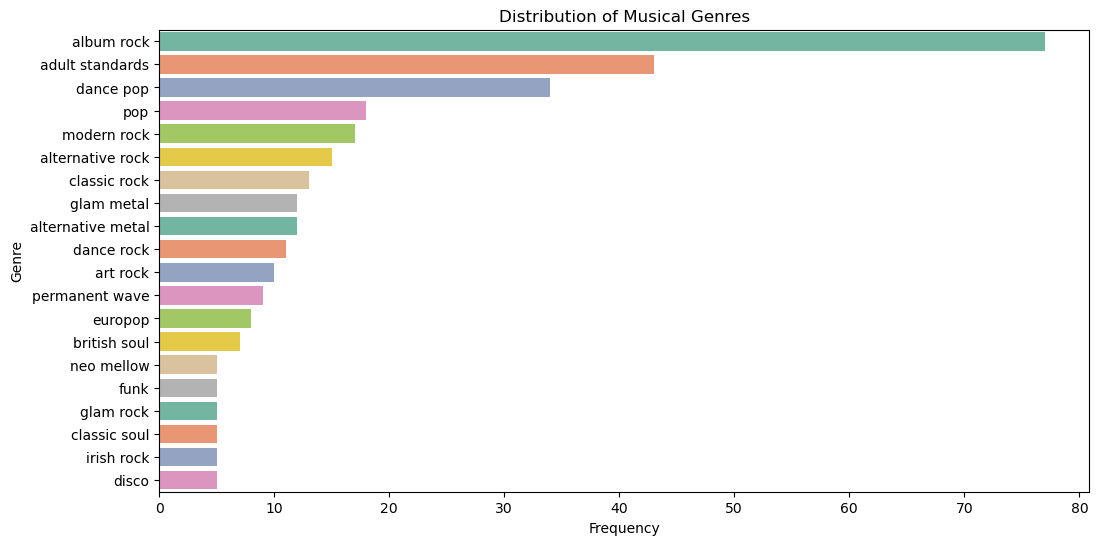

In [3343]:
# Next we will want to see what the frequency is for this new data set to see if it looks similar as the original one
# a similar distribution means that we can use the data but a different one means we have to proceed with caution

# Show the genres with the most occurences in the new merged data set
plt.figure(figsize=(12, 6)) # the size of the chart
# define the new data as the data to use and the order as the highest number of counts first and lowest last, show only the first 20
sb.countplot(y='Genre', data=merged_df, order=merged_df['Genre'].value_counts().head(20).index, palette='Set2') 
plt.title('Distribution of Musical Genres') # give it a title
plt.xlabel('Frequency') # give it an x axis label
plt.ylabel('Genre') # give it a y axis label
plt.show()

#### Graph Analysis: 
#### We can see that the data is still very simmilar to before the merge. There are some order shifts and lower frequency values but that is to be expected. Since it is similar, we can continue with this data. 

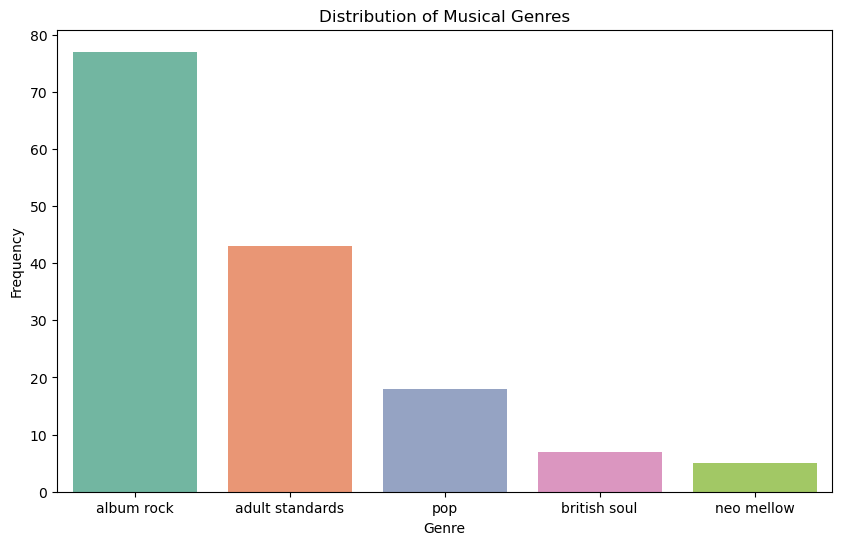

In [3346]:
# Now that we saw that the distribution of frequency is similar to the one before the merge, we also want to see if the distribution of the 
# genres we are analyzing is any different compared to before.

# show the new number of occurences for the new data set for only the wanted genres we are analyzing
genres = ['album rock','adult standards','pop','british soul','neo mellow']
filtered_merged_df = (merged_df[merged_df['Genre'].isin(genres)])

# make a countplot for the new merged data and order by frequency
plt.figure(figsize=(10, 6)) # set the size of the plot
# define the new data as the data to use and the order as the highest number of counts first and lowest last
sb.countplot(x='Genre', data=filtered_merged_df,order=filtered_merged_df['Genre'].value_counts().index, palette='Set2')
plt.title('Distribution of Musical Genres') # rename the title
plt.xlabel('Genre') # name the x lables
plt.ylabel('Frequency') # name the y lables
plt.show()

#### Graph Analysis: 
#### We can see that the data is follows the exact same trend as before the merge. Because of this we can assume that the findings will be accurate to characterize the factors that make up a top song, but the order was not nedded in order to draw conclusions for genre and its sentiment so we can proceed. 

In [3349]:
# We now have the new data but we want to make sure we have enough data to draw conclusions and the graph we just made is hard to see
# exact values so we will be going through each genre and printing out the frequency of occurences for each genre


print('Number of songs for each Genre:\n') 
for genre in genres: # go through each genre we are analyzing
    # find the number of occurences for each genre and .shape gives us the rows and collumns and [0] specefies the number of rows giving us
    # the count of occurences
    frequency = merged_df.query(f"Genre == '{genre}'").shape[0] 
    if frequency == 1: # if the frequecy is 1 then diffferent wording song vs songs
        print(f"\033[1m{frequency}\033[0m song for \033[1m{genre}\033[0m")
    else:
        print(f"\033[1m{frequency}\033[0m songs for \033[1m{genre}\033[0m")


Number of songs for each Genre:

77 songs for album rock
43 songs for adult standards
18 songs for pop
7 songs for british soul
5 songs for neo mellow


#### For the sake of this project we will asumme that more than 5 samples is enough to draw conclusions about the genre, and all the genres have above 5.

### Step 3: Create a new data set that includes the sentiment scores and include the song TITLE and GENRE

In [3353]:
# Now that we have seen we have the data ready with enough samples and the lyrics, we need to find the sentiment for each genre.
# To do this we need to use Vaders to go through the lyrics and gather the sentiment scores of the lyrics of each song.
# after gathering the lyrics of each song we will need to store that informaiton in order to use it. 

# Go through each song in the merged data set and add the title, and genre into a dictionary
# Use the sia polairty scores tool to get the sentiment scores for each song 

# To store the information we wil create a list that will contain a dictionary for each song where it contains:
# the title, genre, and negative, neutral, and positive sentiment scores
results = []

# This loop goes over each row in the merged_df DataFrame. i is the title of the row, and row is representing the row's data.
for i, row in merged_df.iterrows():     
    text = row['Lyrics']  # define what section of the data are lyrics
    title = row['Title'] # define what section of the data is the title
    genre = row['Genre'] # define what section of the data is the genre

    sentiment_scores = sia.polarity_scores(text) # use vaders to get the sentiment scores of the lyrics and store it as sentiment scores

    
    results.append({ # append the results into the results list where we give it a dictioary that has:
        'Title': title, # the key is title, and the value is the title of the song
        'Genre': genre, # the key is genre, and the value is the genre from the data
        'Negative': sentiment_scores['neg'], # the key is negative and the value is the negative sentiment score from vaders polarity score
        'Neutral': sentiment_scores['neu'], # the key is neutral and the value is the neutral sentiment score from vaders polarity score
        'Positive': sentiment_scores['pos'], # the key is positive and the value is the positive sentiment score from vaders polarity score
        'Compound': sentiment_scores['compound']}) # the key is compound and the value is the compound sentiment score from vaders 
                                                    # polarity score

In [3381]:
# Next we want to see the results: the list with dictionaires we made to make sure it looks correct

results # show the results list

[{'Title': 'Venus', 'Genre': 'classic rock', 'Negative': 0.033, 'Neutral': 0.661, 'Positive': 0.306, 'Compound': 0.9946}, {'Title': 'Lonely Boy', 'Genre': 'alternative rock', 'Negative': 0.132, 'Neutral': 0.569, 'Positive': 0.299, 'Compound': 0.9905}, {'Title': 'Charlie Brown', 'Genre': 'permanent wave', 'Negative': 0.0, 'Neutral': 0.961, 'Positive': 0.039, 'Compound': 0.7003}, {'Title': 'Waterloo', 'Genre': 'europop', 'Negative': 0.116, 'Neutral': 0.847, 'Positive': 0.037, 'Compound': -0.8981}, {'Title': 'Tragedy', 'Genre': 'adult standards', 'Negative': 0.159, 'Neutral': 0.691, 'Positive': 0.15, 'Compound': -0.4767}, {'Title': 'Peter Gunn Theme', 'Genre': 'album rock', 'Negative': 0.062, 'Neutral': 0.844, 'Positive': 0.094, 'Compound': 0.9949}, {'Title': 'Why', 'Genre': 'europop', 'Negative': 0.031, 'Neutral': 0.437, 'Positive': 0.532, 'Compound': 0.9991}, {'Title': 'Money', 'Genre': 'album rock', 'Negative': 0.0, 'Neutral': 0.65, 'Positive': 0.35, 'Compound': 0.9906}, {'Title': 'Apa

In [3383]:
# We now have the data of genres sentiment scores, title, and genre all neatly organized in a dictionary including:
# the song title, genre, and sentiment scores. We now want to use this list of dictionaries to make a new dataset where each dictionary
# in the list is a row of data

# make the new data frame
sentiment_df = pd.DataFrame(results) #pd.dataframe turns the results into a data frame
sentiment_df.head() # show the new data

,Title,Genre,Negative,Neutral,Positive,Compound
0,Venus,classic rock,0.033,0.661,0.306,0.9946
1,Lonely Boy,alternative rock,0.132,0.569,0.299,0.9905
2,Charlie Brown,permanent wave,0.000,0.961,0.039,0.7003
3,Waterloo,europop,0.116,0.847,0.037,-0.8981
4,Tragedy,adult standards,0.159,0.691,0.150,-0.4767


In [3385]:
# we want to make sure everything transfered over well to this new data frame so we want to print the data types an shape of the new data
# to make sure it matches up with the merged data set from before. The one from before had 562 rows so it this one has 562 we are good to go

print(sentiment_df.shape) # show the rows and collumns
print(sentiment_df.dtypes) # show the data types

(408, 6)
Title        object
Genre        object
Negative    float64
Neutral     float64
Positive    float64
Compound    float64
dtype: object


### Step 4: Create Visuals on the difference in sentient scores between the genres in order to arrive at a conclusion

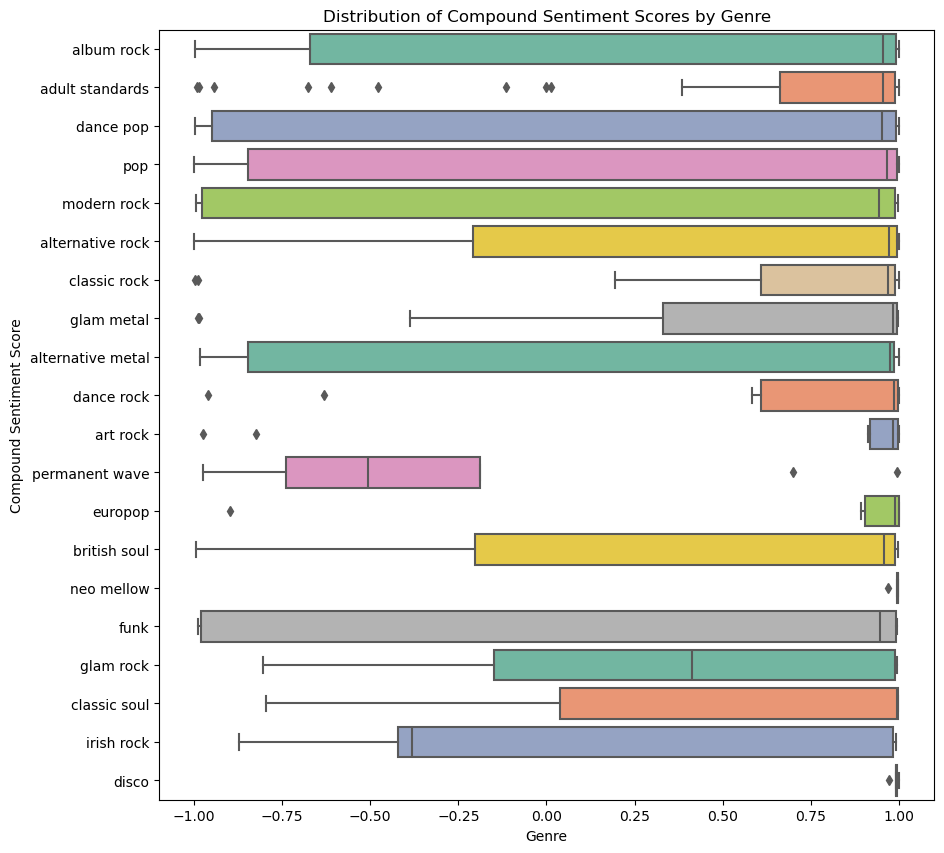

In [3362]:
# with th enew data that we have created lets see a rough graph showing how the compound sentiments compare for the top 20 genres


# define the order to follow as frequency and show only the top 20
genre_order = sentiment_df['Genre'].value_counts().head(20).index

plt.figure(figsize=(10, 10)) # set the size 
# define the data as the new data we created and the order as the order we just made
sb.boxplot(x='Compound', y='Genre', data=sentiment_df, order=genre_order, palette='Set2')
plt.title('Distribution of Compound Sentiment Scores by Genre') # give it a title
plt.xlabel('Genre') # give the x axis a label
plt.ylabel('Compound Sentiment Score') # give the y axis a label
plt.show()

#### Graph Analysis: When it comes to compound, the key genres that pop out is disco, art rock, and europop for their high compound close to 1.0 and then we also have modern rock, dance pop, and british soul with a very wide range of compound scores from -1 to 1

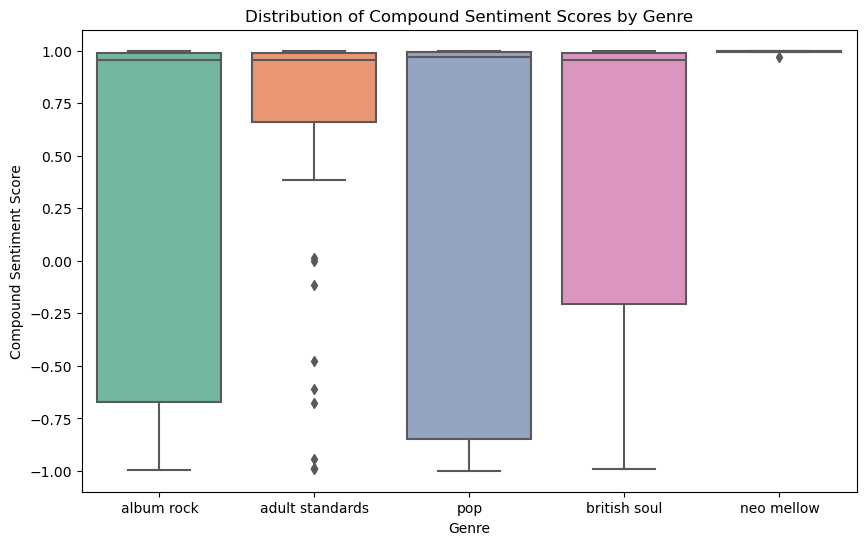

In [3365]:
# Now that we have seen the compound for the top 20 genres, lets see how it is just for the genres we are analyzing

# filter the data to only show the genres that we are interested in
filtered_sentiment = (sentiment_df[sentiment_df['Genre'].isin(genres)])

plt.figure(figsize=(10,6)) # set the size of the plot
# define the data as the filtered data we just made and order it by highest frequency to lowest frequency
sb.boxplot(x='Genre', y='Compound', data=filtered_sentiment, order=filtered_sentiment['Genre'].value_counts().index, palette='Set2')
plt.title('Distribution of Compound Sentiment Scores by Genre') # give it a title
plt.xlabel('Genre') # give it an x axis label
plt.ylabel('Compound Sentiment Score') # give the y axis a label
plt.show()

#### Graph Analysis: We can see that for the compound score, album rock, pop, and british soul vary heavily from -1 to 1 while adult standards and neo mellow specifically tend to stay high near 1. The result fore neo mellow could be because of its low sample size but the rest seem to be a good representation. 

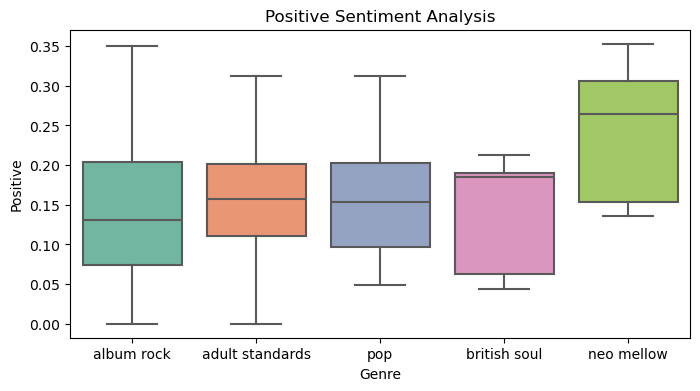

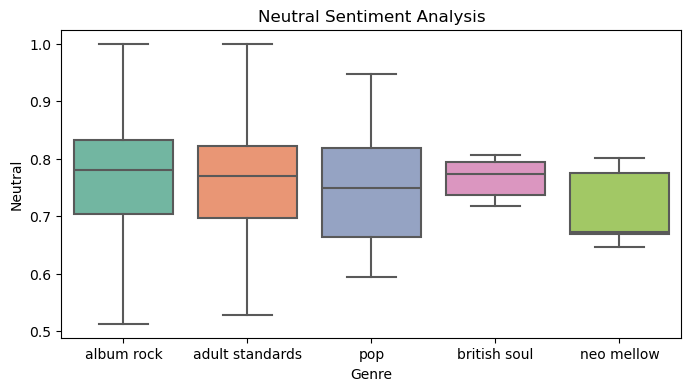

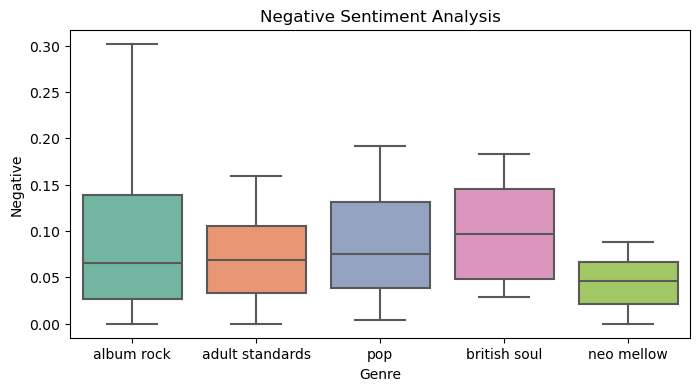

In [3368]:
# now that we have seen the compund score, it doesn't say too much about the genres so let's o through each sentimetn analysis
# and create a box plot for the positive, neautral, and negative sentiment scores for the specefied genres we are analyzing

# define the collumns that we are going to analize
collumns = ['Positive','Neutral','Negative']
for collumn in collumns: # go through each of the collumns and make the following barplot with order being high to low on frequency
    plt.figure(figsize=(8,4)) # set the size
    sb.boxplot(x='Genre', y=collumn, data=filtered_sentiment, order=filtered_sentiment['Genre'].value_counts().index, 
               showfliers=False,palette='Set2') # we also want to ignore the outliers in order to understand the data better 
                                                # and in more detail
    plt.title(f'{collumn} Sentiment Analysis') # make the title the current row we are analyzing
    plt.show()

### Graph Analysis
#### Positive
-  The positive values seem to follow the trend of the negative values. All of them seem to be very similar except for british soul. British sould has a clearly less positive sentiment analysis giving it the characteristic of having low positivity sentiment. The only other onw that stands out is neo mellow being higher in positivity.
#### Neutral 
- The neutral values are about all the same for the inner quartiles but for the whiskers there is a trend where it decreases in the same direction as frequency. This is proably since there a are more samples to analyze for the left and it decreases as we move to the right so we will not be drawing a conclusion from this
#### Negative
- When it comes to negative we can see that british soul is clearly visible as the most negative of the group, and neo mellow as the least negative, while the rest have very similar outputs excep album rock. Album rock has a wide range of data but very simmilar results to the other 2. From this we can conclude that they all contain similar amounts of negative but british soul we can conclude has a charactersitic of being negative and neo mellow has a chaacteristic of being positive.

#### Take Aways: 
- **neo mellow** has a **high** positivity
- **neo mellow** has a **low** negativity
- **british soul** has a **low** positivity
- **british soul** has a **high** negativity

# Neo_Mellow_Artists_Analysis
### 1. The Fray 
### 2. James Bay
### 3. Andy Grammer

#### The goal in this Analysis is to gather data on the songs of the three Artists above and be able to diferentiate how they compare to each other. We have seen how Neo Mellow is different compared to other genres but we now wnat to observe how the artists in the genre themselves differentiate from each other. In order to get an aswer to this we want to see the audio features for each artist and compare them against each other.

### Step 1: Set up the analysis (import resources and access API)

In [3374]:
# import every tool needed to complete the following analysis

import time
import requests
import pandas as pd
import os
from dotenv import load_dotenv

# Load the client Id and Secret from the following file
load_dotenv("3510.env")

# Set up Spotify credentials
clientID = os.getenv("NEW_SPOTIFY_CLIENT_ID")
clientSecret = os.getenv("NEW_SPOTIFY_CLIENT_SECRET")
grantType = 'client_credentials'

# define the url, parameters, and response in order to get our access token
url = "https://accounts.spotify.com/api/token"
bodyParams = {'grant_type': grantType}
responseJSON = requests.post(url, data=bodyParams, auth=(clientID, clientSecret)).json()

# Get the access token, define the headers we will need, and the root url for the API
token = responseJSON["access_token"]
headers = {"Authorization": "Bearer " + token}
rootURL = 'https://api.spotify.com/v1/'

## Step 2
### A. Get all the songs of each artist and find the data features for each song.
### b. Create a data set for each artists song features and cobmbine them together to have all the data in one place

In [3377]:
# We want to go step by step in order to end up at all the artists songs audio features. 
# To do this we will need to complete the following steps
# 1. Make a requests function that we will use throught the other functions in order to simplify things
# 2. Make a function that will get the artists ID
# 3. Make a function that will get all the albums data
# 4. Make a function that will get all the albums tracks
# 5. Make a function that will get all the songs Id's
# 6. Make a funciton that will get all the songs audio features

# Step 1: make a request function

def make_request(endpoint):  # will take in the endpoint and return the request
    response = requests.get(rootURL + endpoint, headers=headers).json() # define our request with the root url and heaaders that we
                                                            # defined at the start
    return response  # return the response 



# Step 2: get the artist's ID

def get_artist_id(artist_name):  # take in the name of an artist 
    artist_data = make_request(f'search?q={artist_name}&type=artist')  # make a request with the endpoin that will get all the 
                                                                        # specefied artists data
    return artist_data['artists']['items'][0]['id']  # go through the artists items and return the id of that artist


# Step 3: get the data of all the artist albums

def get_artist_albums(artist_id): # take in the artist Id we just found
    albums = [] # make an empty list where we will add the album ids to
    endpoint = f'artists/{artist_id}/albums?include_groups=album,single&limit=50'
        # because we want to limit the number of requests we make, we want to do 50 at a time instead of 50 requests at a time
    
    while endpoint: # while there are still albums to go through do the following
        response = make_request(endpoint) # make the request to get the first 50 albums
        albums.extend(response['items']) # collect the itmes of the albums and add it to the list
        # .extend adds the items on to the list individualy while .append would do it ass a group
        endpoint = response.get('next')  # check if there is still another page of albums and if there is go to the next page

    return albums # retun the albums data



# Step 4: get all the trakcs data of an artist from an albums id 

def get_album_tracks(album_id): # take in the albums id
    songs = [] # create a list that will hold our songs
    
    response = make_request(f'albums/{album_id}/tracks') # make the request to get the albums tracks
    songs.extend(response['items']) # add the tracks items into our songs list

    return songs # return the tracks data that we stored in the list



# Step 5: get all the artist's song IDs using the artist Id that we will gather in the next step

def get_artist_songs(artist_name): # take in an artists name 
    artist_id = get_artist_id(artist_name) # take the artists name through the artist id funciton to get the id of that artist
    song_ids = [] # create a list where we will keep all the song ids
    albums = get_artist_albums(artist_id)  # Use the function that gets the data for all the artists albums using the id of the artist

    # Collect the songs Id's
    for album in albums: # go through the each albums data that we just defined as 'albums'
        album_id = album['id'] # define what the album id is
        album_tracks = get_album_tracks(album_id) # get the tracks of each album using the album id that we just defined
        for track in album_tracks: # go through each track of the album that we just created
            song_ids.append(track['id']) # add the id of the songs to our song ids list, we use append here to 
                                        # add each song id together instead of .exted adding the individual characters into the list

    return song_ids # return the list of song Ids that we got


    
# Step 6: get the audio features for all the songs using the song ids that we got

def get_audio_features(song_ids): # take in the song id's that we just made
    audio_features = [] # create a list where we will store all the audio features
    
    for i in range(0, len(song_ids), 50): # this will go through the audio features 50 at a time and group the 50 ids together into batches
        batch_ids = song_ids[i:i + 50] # so that each batch will pass through one at at time until there are no more batches 
        ids = ','.join(batch_ids) # join the batches on , and remove the '' so that it will be able to pass through the request as a batch
        
        response = make_request(f'audio-features?ids={ids}') # make our request where it will take in a list of ids 
                                                            # the ?ids= lets us do a batch instead of individual id

        audio_features.extend(response['audio_features']) # add the audio features individualy to our list of audio features
        time.sleep(1)  # Delay between requests # sleep it one second in between batches so that we dont overload the api

    return audio_features # return our list of audio features that we have created


In [3283]:
# make a checkpoint to get all the song id's for a specefied artits, we also need this as the parameter for the audio features def

# run each artist through the def we made to grab all the song id's
fray_songs = get_artist_songs('The Fray') 
bay_songs = get_artist_songs('James Bay')
grammer_songs = get_artist_songs('Andy Grammer')

In [3285]:
# lets see if we were able to get the song names and also lets see how many songs each artist has, 
# and how many songs we have to work with for our data for each artist

# print the number of songs in each artist song list
print(len(fray_songs))
print(len(bay_songs))
print(len(grammer_songs))

107
147
114


In [3180]:
# now we want to get the audio features for all the songs on the list by running it thorugh the def we made

# run each list of songs through the def we made to grab the audio feaures
fray_features = get_audio_features(fray_songs)
bay_features = get_audio_features(bay_songs)
grammer_features = get_audio_features(grammer_songs)

In [3190]:
# now that we have succesfully grabed the audio features, lets make it into a data frame to use for analyzing

# create a def that will use the audio features and transform it into a data fram but only use the columns we want in it
def get_artist_df(audio_features):

    df = pd.DataFrame(audio_features) # Create a data frame from the audio features

        
    audio_feature_columns = [ # drop all the other columns we dont want and only have the following columns
        'danceability', 'energy', 'loudness', 
        'speechiness', 'acousticness', 
        'liveness', 'valence', 'tempo'
    ]
    df = df[audio_feature_columns]  # Keep only the audio feature columns that we have specified
        
    return df # return the new data frame that we have created

In [3192]:
# create a data frame for each artists song features and properly name it

# run each artists features through our data frame maker function
fray_df = get_artist_df(fray_features)
bay_df = get_artist_df(bay_features)
grammer_df = get_artist_df(grammer_features)

In [3202]:
# because we will be joining all 3 data sets together lets make a collumn that will have the aritsts name so that we can identefy
# whos data is who's

# add a collumn named artist, and make the value the artist name
fray_df['artist'] = 'The Fray'
bay_df['artist'] = 'James Bay'
grammer_df['artist'] = 'Andy Grammer'

In [3204]:
# show the data frame we created for our artist The Fray

fray_df.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,artist
0,0.468,0.878,-3.434,0.0522,0.001240,0.0734,0.186,156.049,The Fray
1,0.632,0.805,-4.488,0.0303,0.009500,0.1970,0.275,115.489,The Fray
2,0.725,0.902,-4.448,0.0745,0.000694,0.0892,0.630,120.987,The Fray
3,0.564,0.923,-3.372,0.0335,0.002220,0.1260,0.792,147.957,The Fray
4,0.466,0.942,-4.260,0.0417,0.000132,0.1900,0.269,140.987,The Fray


In [3206]:
# show the data frame we created for our artist James Bay

bay_df.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,artist
0,0.601,0.876,-4.764,0.0463,0.19500,0.0645,0.671,91.010,James Bay
1,0.498,0.575,-4.404,0.0284,0.03330,0.0705,0.382,165.227,James Bay
2,0.596,0.508,-8.484,0.0330,0.59100,0.0851,0.598,81.991,James Bay
3,0.606,0.839,-5.197,0.0494,0.00213,0.1270,0.715,135.922,James Bay
4,0.645,0.271,-10.781,0.0418,0.76000,0.1100,0.243,70.897,James Bay


In [3208]:
# show the data frame we created for our artist Andy Grammer

grammer_df.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,artist
0,0.615,0.867,-5.423,0.0474,0.00289,0.3120,0.564,154.002,Andy Grammer
1,0.560,0.712,-5.436,0.0580,0.00825,0.0914,0.190,156.112,Andy Grammer
2,0.582,0.739,-5.416,0.0882,0.02430,0.0780,0.652,177.026,Andy Grammer
3,0.730,0.839,-4.413,0.0485,0.01800,0.0971,0.724,131.000,Andy Grammer
4,0.698,0.767,-4.455,0.0444,0.00490,0.4050,0.295,129.950,Andy Grammer


In [3214]:
# now that we have made the new data fram lets make sure it all went smoothly and all the songs for each artist got changed into data
# to check this lets see the number of rows and compare it to the len we did of our list of songs for each artits

print(fray_df.shape) # was 107 before
print(bay_df.shape) # was 147 before
print(grammer_df.shape) # was 114 before

(107, 9)
(147, 9)
(114, 9)


In [3218]:
# everything seems to match up so lets go ahead and combine the three data sets in order to analyze it

# using pd. concat we can combine all the 3 data sets togehter and ignoring the index to avoid making duplicates
combined_df = pd.concat([fray_df, bay_df, grammer_df], ignore_index=True)
combined_df # lets see the new data that we have created

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,artist
0,0.468,0.878,-3.434,0.0522,0.001240,0.0734,0.186,156.049,The Fray
1,0.632,0.805,-4.488,0.0303,0.009500,0.1970,0.275,115.489,The Fray
2,0.725,0.902,-4.448,0.0745,0.000694,0.0892,0.630,120.987,The Fray
3,0.564,0.923,-3.372,0.0335,0.002220,0.1260,0.792,147.957,The Fray
4,0.466,0.942,-4.260,0.0417,0.000132,0.1900,0.269,140.987,The Fray
...,...,...,...,...,...,...,...,...,...
363,0.827,0.560,-6.685,0.0327,0.550000,0.1500,0.873,122.056,Andy Grammer
364,0.797,0.896,-3.678,0.0512,0.034900,0.6350,0.685,120.037,Andy Grammer
365,0.620,0.826,-6.968,0.0458,0.033000,0.0948,0.603,99.964,Andy Grammer
366,0.664,0.631,-10.542,0.0592,0.106000,0.9640,0.618,100.011,Andy Grammer


## Step 3: Create a visualization to analyze each Audio Feature in order to see how the artists compare to one another.

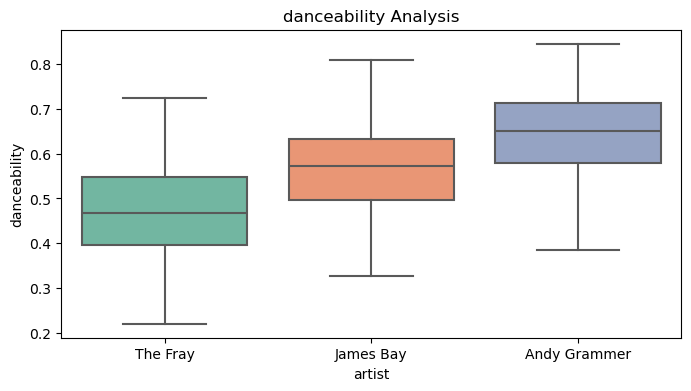

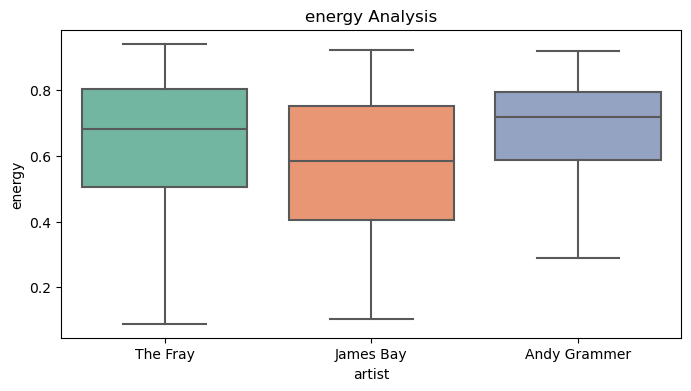

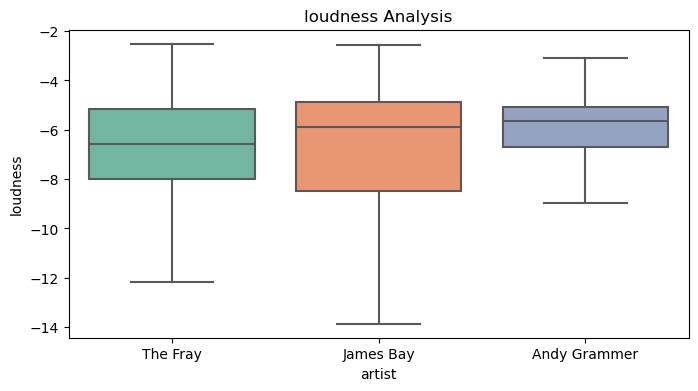

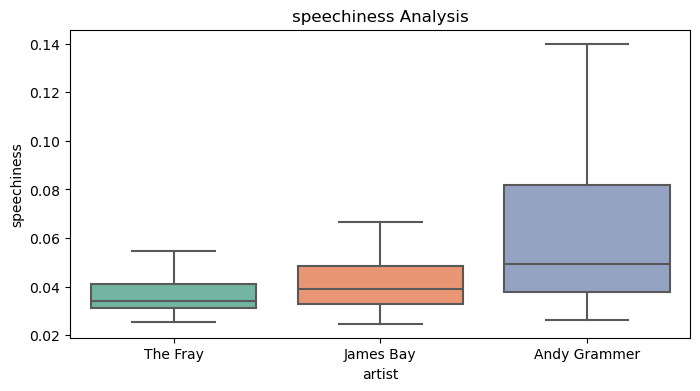

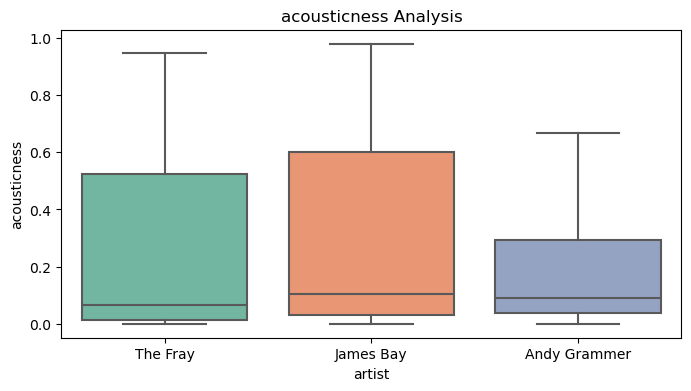

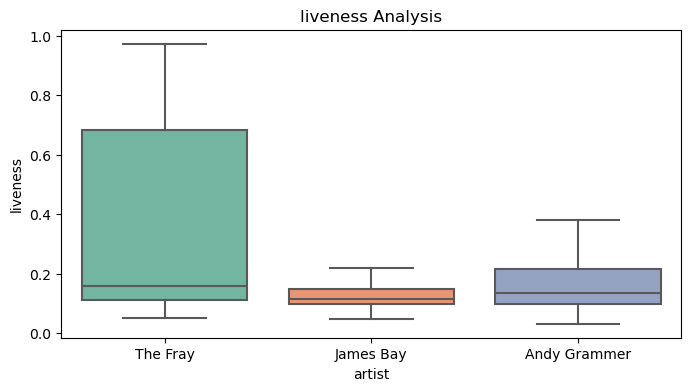

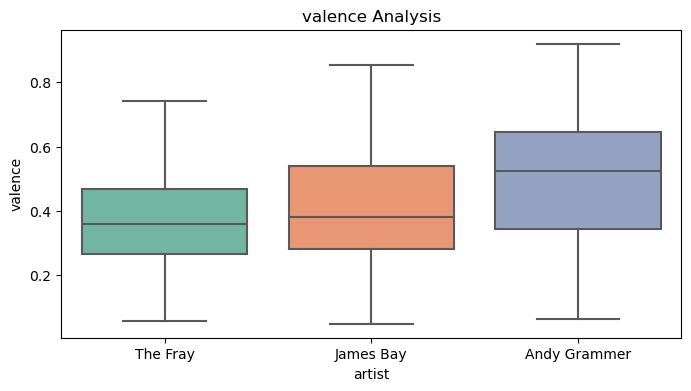

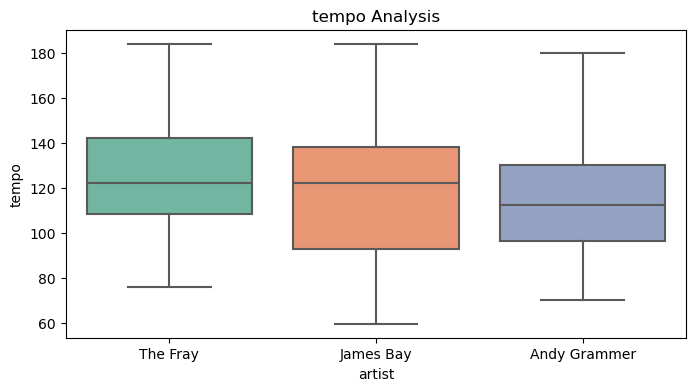

In [3222]:
# Finally, after all that hard work lets make some visualizations about the data and draw some conclusions
# what we are looking to do is make a viz for each individual collumn in our data and analize how each artist compares to one another

# deffine the collumns that we want to make a graph for so we can compare the artist in each column
df_collumns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']
for collumn in df_collumns: # go through each individual collumn in order to make a viz for it
    plt.figure(figsize=(8,4)) # define the size of the graphs that we want to make
    sb.boxplot(x=combined_df['artist'], y=collumn, data=combined_df, showfliers=False, palette='Set2') 
    # specify the data as the combined data, the x axis as the artist, the y as the collumn we are analyzing, and ignore the outliers
    plt.title(f'{collumn} Analysis') # Set the title as the current collumn that we are analyzing
    plt.show() 

### Graph Analysis
#### Danceability 
-  **The Fray:** Similar range to the other two but being on the low end compared to the other two (low)
-  **James Bay:** Same range size as the other two but seems to be right around the middle (mid)
-  **Andy Grammer:** Has a range of values relativeley higher than the other two (high)
#### Energy 
-  **All Three** seem to be very similar with the only noticable diffrence being andy grammer having a shorter lower quartile range than the other two.
#### Loudness
-  **The Fray:** Shorter range than James, but higher than the fray with the data being mostly near the (mid/high)
-  **James Bay:** Seems to cover all the values with a wide range being mostly evenly spread out (mid)
-  **Andy Grammer:** Short range of values with it being on the higher end compared to the other two (high)
#### Speechiness
-  **The Fray:** Very small speechiness with low values and a short range (low)
-  **James Bay:** Similar to The Fray, low values but a slighly wider range than The Fray (low)
-  **Andy Grammer:** Very wide range of values compared to the other two. The upper quartile seems to spread out while the lower quartile is very condenced (mid)
#### Acousticness
-  **All Three** have very similar values with a condenced lower quartile and a very wide value of ranges for the upper quartile. The only vidsible difference is Andy Grammers slightly lower and more condeced range and values. 
#### Liveness
-  **The Fray:** Similar lower quartile like the other two but very wide range for the upper quartile.
-  **James Bay:** Very low and condenced data points (low)
-  **Andy Grammer:** Low range and values similar to James bay but with a higher range and values (low)
#### Valance
-  **All Three** have very similar values with the same low and mid values but The fray has a lower range while Andy has the higher range. 
#### Tempo
-  **All Three** have very similar values with James Bay having a slighly larger range than the other two, but no other noticable differences.
####
#### Take Aways: 
-  **The Fray:** The fray has a low speechiness, lower liveness, valance, accousticness, and danceability. This would all make since because they all compliment each other when it comes to making sadder more calm music. The low volume, low amount of lyrics, acousticness of a guitar, and the sadder lyrics all make the song low to dance.  
-  **James Bay:** His low liveness, speechiness, and high accousticness all pair well with each other making a calmer more relaxing song. The surprising thing would be his higher volume since the other low values usually pair better with a lower volume. 
-  **Andy Grammer:** has  high loudness, speechiness, energy, and dancebailiy while having a low accousticness which compliment each other. The loud sound, lyrics, and energy all contribute to create a song that is more enjoyable. The one surprising thing would be his low liveness considering its high danceability and energy. 

# Conclusion

## Research Question: How do different musical genres influence listeners' emotions, and can this influence be determined by analyzing audio features such as tempo, valence, and sentiment?

The aim of this analysis was to identify the defining characteristics that evoke the emotional responses associated with different musical genres. For instance, **Pop** is often linked to feelings of joy, energy, and excitement. **Album Rock** tends to evoke a thoughtful, adventurous, and wide range of emotions. **Neo Mellow** is associated with calmness and soothing effects. **Adult Standards** evoke nostalgia, romance, and tranquility. Lastly, **British Soul** carries deep, passionate emotions.

##  Overall Findings
This analysis highlights key audio features that contribute to the emotional qualities of each genre. While there are many other attributes to consider, these features stand out as defining characteristics.
#### Album Rock
- **High Energy:** Album rock's high energy often gives it a nostalgic, uplifting feel.
- **High Speechiness:** The storytelling aspect of album rock is enhanced by high speechiness, helping convey narrative depth.
- **High Liveness:** The high liveness suggests that these tracks shine in live performances, a signature of album rock concerts. Imagine experiencing "Winds of Change" live!
- **Low Acousticness:** The use of electric guitars lowers acousticness, complementing its energetic and lively sound.
#### Adult Standards
- **Low Energy:** The low energy of adult standards lends itself to calmer, more romantic tracks that are best enjoyed at a softer volume.
- **Low Loudness:** Low loudness contributes to the genre’s nostalgic and soothing nature.
- **Low Duration:** While songs tend to be shorter, no strong correlation between duration and specific emotions was identified.
#### Pop
- **High Energy:** Pop’s high energy creates a joyful, danceable atmosphere that makes you want to move.
- **High Danceability:** Combined with high energy, its danceability is a key reason why pop is popular in clubs.
- **High Loudness:** Louder volumes enhance the energetic and uplifting feeling typical of pop music.
- **High Speechiness:** The fast-paced, word-heavy nature of pop contributes to its high energy, distinguishing it from calmer genres.
#### British Soul
- **High Volume:** The genre’s high volume amplifies the passion behind its lyrics. Adele, for example, uses volume shifts to heighten emotional impact.
- **Low Valence (Low Positivity / High Negativity):** British soul often conveys heartbreak and love, which explains its low valence. The blend of sad themes and powerful delivery results in a deeply emotional genre.
#### Neo Mellow
- **High Acousticness:** The genre’s use of acoustic instruments like guitars gives it a mellow, soothing sound that aligns with its calmer tone.
- **Low Energy:** Neo mellow is known for its subdued energy, evoking emotional depth and introspection.
- **Low Valence:** Its lower valence reflects the sad or melancholic themes often found in the lyrics.
- **High positivity / Low negativity:** Having the oposite results than valance, it seems to come as a highly positive sentiment. This may be because when analyzing sentiment with vaders it analyzed the words themselves without context and they may seem positve, while the valance may be utalizing the context of the song and see it as more negative.
- **Low Liveness:** Though the genre may not translate as well to live settings compared to pop or album rock, its acoustic nature and emotional weight resonate in intimate listening experiences.

## Neo Mellow In Depth Dive Findings
#### Take Aways: 
#### **The Fray:** 
- The fray has a low speechiness, lower liveness, valance, accousticness, and danceability. This would all make since because they all compliment each other when it comes to making sadder more calm music. The low volume, low amount of lyrics, acousticness of a guitar, and the sadder lyrics all make the song low to dance.  
#### **James Bay:** 
- His low liveness, speechiness, and high accousticness all pair well with each other making a calmer more relaxing song. The surprising thing would be his higher volume since the other low values usually pair better with a lower volume. 
#### **Andy Grammer:**
- Has a high loudness, speechiness, energy, and dancebailiy while having a low accousticness which compliment each other. The loud sound, lyrics, and energy all contribute to create a song that is more enjoyable. The one surprising thing would be his low liveness considering its high danceability and energy. 


#### Other Findings:
##### Through this analysis I was also able to find qualities that will help a song reach the top charts. These qualities include:
- High levels of Liveness, valance, duration, and energy.
- Low levels of accousticness.

## Takeaways:
- This analysis provides insight into how different audio features contribute to the emotional responses elicited by various musical genres. Each genre's distinct combination of energy, loudness, and instrumental choices creates a unique emotional landscape, showing that music’s emotional influence can, to some extent, be analyzed and understood through its audio attributes.


# Sources
1. Volt.fm --> https://volt.fm/genre/1033/album-rock & https://volt.fm/genre/1099/adult-standards & https://volt.fm/genre/1140/pop & https://volt.fm/genre/1650/british-soul & https://volt.fm/genre/1301/neo-mellow
2. Data Sources --> https://www.kaggle.com/datasets/brianblakely/top-100-songs-and-lyrics-from-1959-to-2019?select=all_songs_data_processed.csv & https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset
3. Sentiment Example walk-through --> https://www.youtube.com/watch?v=QpzMWQvxXWk&list=WL&index=3&t=2220s (make data sets in python, use vader sentiment analyzer)
4. Pandas Joins --> https://www.geeksforgeeks.org/different-types-of-joins-in-pandas/
5. Removing outliers in boxplots --> https://stackoverflow.com/questions/35131798/tweaking-seaborn-boxplot
6. Changing an argument to a numeric in pandas data --> https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
7. Getting rid of data with missing information --> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
8. Print statement colors/bolding/etc. --> https://stackoverflow.com/questions/8924173/how-can-i-print-bold-text-in-python
9. Getting rid of duplicates --> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
10. How to add items to a list as individual things --> https://www.geeksforgeeks.org/python-list-extend-method/
11. Spotify API --> https://developer.spotify.com/documentation/web-api
12. Join several data frames together --> https://www.kdnuggets.com/2023/03/3-ways-merge-pandas-dataframes.html#:~:text=Concat,along%20the%20rows%20(vertically).